In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [5]:
X_train = np.loadtxt('Datasets/input.csv', delimiter=',')

In [6]:
X_test = np.loadtxt('Datasets/input_test.csv', delimiter=',')

In [8]:
y_train = np.loadtxt('Datasets/labels.csv', delimiter=',')

In [9]:
y_test = np.loadtxt('Datasets/labels_test.csv', delimiter=',')

In [10]:
X_train.shape

(2000, 30000)

In [11]:
X_test.shape

(400, 30000)

In [12]:
y_train.shape

(2000,)

In [13]:
y_test.shape

(400,)

In [19]:
X_train = X_train.reshape(len(X_train), 100,100,3)
X_test = X_test.reshape(len(X_test), 100,100,3)
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

In [27]:
X_train = X_train/255.0
X_test = X_test/255.0

In [28]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

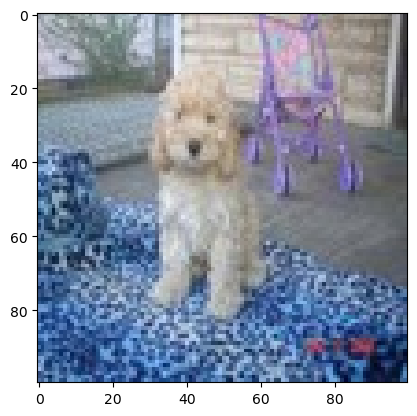

In [36]:
index = random.randint(0,len(X_train))
plt.imshow(X_train[index,:])
plt.show()

In [98]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [99]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [102]:
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 417ms/step - accuracy: 0.8493 - loss: 0.3581
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 419ms/step - accuracy: 0.8756 - loss: 0.2909
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 428ms/step - accuracy: 0.9009 - loss: 0.2220
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 424ms/step - accuracy: 0.9032 - loss: 0.2306
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 420ms/step - accuracy: 0.9575 - loss: 0.1372


In [103]:
result = model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7066 - loss: 0.8065 


In [104]:
result

[0.7966597080230713, 0.7099999785423279]

In [105]:
model.metrics_names

['loss', 'compile_metrics']

In [106]:
predict_idx = random.randint(0,len(y_test))
X_test[predict_idx, :].shape

(100, 100, 3)

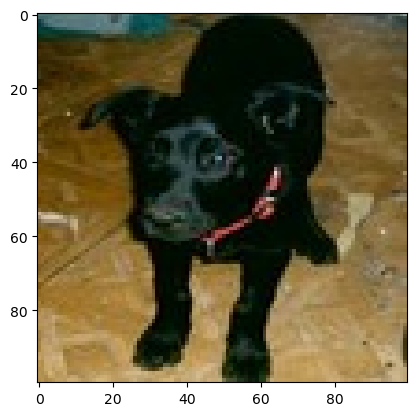

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[0.00050442]]
DOG


In [128]:
predict_idx = random.randint(0,len(y_test))
plt.imshow(X_test[predict_idx,:])
plt.show()
y_pred = model.predict(X_test[predict_idx, :].reshape(1,100,100,3))
print(y_pred)
y_pred = y_pred >0.5
if(y_pred[0][0]==False):
    print("DOG")
else:
    print("CAT")

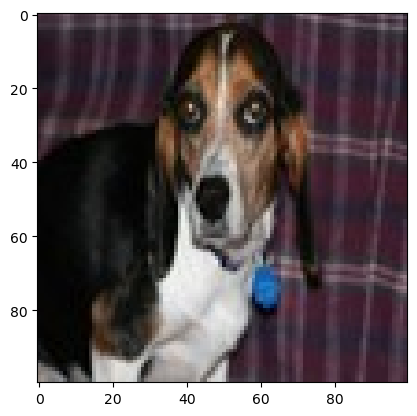

[0.]


In [56]:
plt.imshow(X_test[150,:])
plt.show()
print(y_test[150])

In [88]:
X_test[predict_idx, :].shape

(100, 100, 3)